# Notebook 2.4.3: Analytical Projections for World Population

---

<br>

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---

In [1]:
#@title
# Import libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
import pandas as pd
import numpy as np

Downloaded ModSimPy_Functions/modsim.py


## Historical World Population

We now have solutions for 3 analytic models of growth (linear, proporational, and quadratic).  Let's use these models to fit a new set of data: the estimates of world population from 100 to 2000.  First, download read the data into a Pandas `DataFrame`:

In [2]:
filename = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Data/World_population_estimates.html'
# If you are using this notebook offline, you will need to upload this data
# from the Images_and_Data folder on your local computer.  
# Comment out the line above, and uncomment the
# line below this one, and run this cell
# filename = '../Images_and_Data/Data/World_population_estimates.html'

tables = pd.read_html(filename, header=0, index_col=0, decimal='M')

table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


Some of the values are null because not all researchers provide estimates for the same dates.  Again, we'll replace the long column names with more convenient abbreviations.

In [3]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

Here are the results for the years after the Year 0 CE.  Notice that we are working in millions now, not billions.  The keyword argument `xlim` defines the limits on the values of the x-axis.

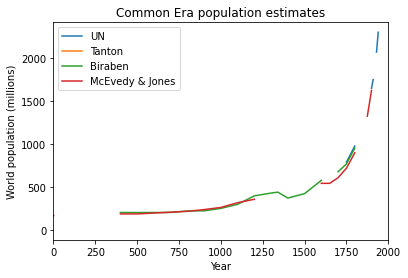

In [4]:
table1.plot(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Common Era population estimates');

✅   Now create 3 models to fit this data.  Notice that we don't need create a `change_func` to do this--that is, we don't have to create our plots using a loop and a `results[i+1] = results[i] + net_growth`.  We now have particular solutions to our 3 models, and we can plot by defining the population at each time step with the solution equations.  We only need to create a time array, and then evaluate the function value at each point in the time array.

<br>

Which model works best for population growth in this time period?

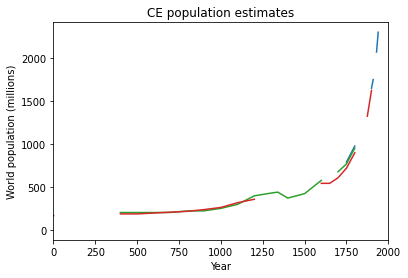

In [6]:
from numpy import exp
# First, create a numpy time array "t_array" from 100 to 2000 with `linspace`


# Create a linear model of form f(t) = Ct + x_0
# First, define your coefficients (we can adjust these later, but you could
# make an initial guess by looking at the plot above and thinking about
# the slope and y intercept)
# Then create a numpy array that evaluates the model at each point in time_array
# Finally, create a Series called "linear" to story the results.  
#To do this, use the form:   pd.Series(index=..., data=...)


    
# Create an exponential growth model of form f(t) = C1 exp(alpha*t)
# Store in a Series


    
# Create a quadratic growth model of the logistic form
# f(t) = (K*p_0*exp(r*t)) / (K + p_0*exp(r*t) - p_0)
# Store in a Series



    
# Now plot your three functions next to the world population data in table1
# Adjust your parameters on the 3 models as necessary
table1.plot(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates',legend=False);





✅ Analysis Question.  Answering the following questions in a text cell below this one:
* Which model works fits the data best?  Which is the least appropriate?
* Why do you think it is the best model? What is different about population growth in this period, as opposed to the 1950-2016 era we were looking at before?
* Under what circumstances can the logistic model be made to match the exponential model?